In [1]:
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/cognition_2023/revisions/notebook02/rois'

Enter the path to the dictionary generated by Notebook 01

In [ ]:
dict_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_01/redo2/conn/tmp/dataset_dict_prune.json'

# 01 - Begin Analysis

What correlation method would you like to use?
- Pearson is very fast, but depends on linearity and is sensitive to outliers
- Spearman is slower, but much more robust

One or Two-Tail P Values?

- ``` tails = 'one_tail' or tails = 'two_tail' ```

Numer of permutations? 
- Pearson is ~10x faster than Spearman

Would you like to compare maps wiht spearman or pearson?

- ``` method = 'spearman' or method = 'pearson' ```

Would you like to FWE correct the pairwise matrix?

- ``` fwe = True or fwe = False ```

In [5]:
tails = 'one_tail'
n_permutations = 1000
method = 'pearson'
fwe = False
datasets_to_flip = []#'Alzheimer Disease', 'Multiple Sclerosis', 'Penetrating TBI']# ['Parietal TMS Hebscher'] #['adni_Alzheimer', 'corbetta_memory', 'manitoba_memory', 'ms_memory']

Run it

In [6]:
from calvin_utils.ccm_utils.ccm_utils import CorrelationAnalysis
correlation_analysis = CorrelationAnalysis(data_dict_path=dict_path, 
                                           method=method, 
                                           datasets_to_flip=datasets_to_flip,
                                           n_permutations=n_permutations,
                                           out_dir=out_dir,
                                           topology_command=None)
p_value, pairwise_p_values = correlation_analysis.run(tails, fwe)

Running permutations: 100%|██████████| 1000/1000 [41:00<00:00,  2.46s/it]

Calculating one-tailed p-values
The observed average similarity is: 0.03012322914666666
The one_tail p-value is: 0.002. This is the proportion of permuted averages that are greater than the observed average.
Overall p-value: 0.002


# 02 - Visualize Results

Similarity matrix (Signs Included)

In [7]:
correlation_analysis.original_similarity_matrix

array([[ 1.00000000e+00, -1.51701563e-02,  6.96860285e-02,
        -3.51781110e-02, -7.18670138e-02,  5.68942245e-03,
         3.54923047e-04,  3.75534298e-03,  3.47746269e-02,
         3.72142669e-04,  3.59274318e-03,  6.07273536e-04,
         1.60451075e-03],
       [-1.51701563e-02,  1.00000000e+00, -1.81693988e-02,
        -7.60675791e-02,  1.06274419e-01, -1.19113677e-02,
        -6.28283580e-03, -5.94279471e-03,  5.05602374e-02,
        -6.45926598e-05, -1.41836235e-02,  6.49871431e-04,
        -2.34835866e-04],
       [ 6.96860285e-02, -1.81693988e-02,  1.00000000e+00,
        -8.95721111e-03, -3.82079042e-02, -6.08734247e-04,
        -8.81790463e-06, -3.97132923e-04,  2.66985837e-02,
        -2.04825088e-03,  3.52180687e-04, -4.48921207e-03,
        -1.05274587e-03],
       [-3.51781110e-02, -7.60675791e-02, -8.95721111e-03,
         1.00000000e+00, -8.27629817e-03, -6.41834248e-03,
        -8.37877796e-04, -3.59156903e-03,  4.23109101e-02,
         3.91071424e-04,  6.51668134e

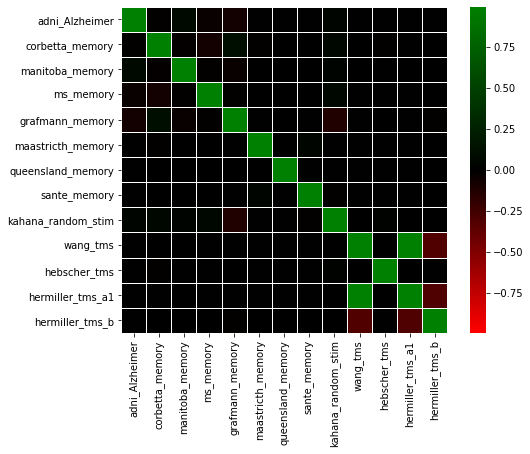

In [8]:
limit = correlation_analysis.matrix_heatmap(correlation_analysis.original_similarity_matrix, type='similarity', output_path=out_dir)

View the Overall Similarities of the Topology, Signs Aside

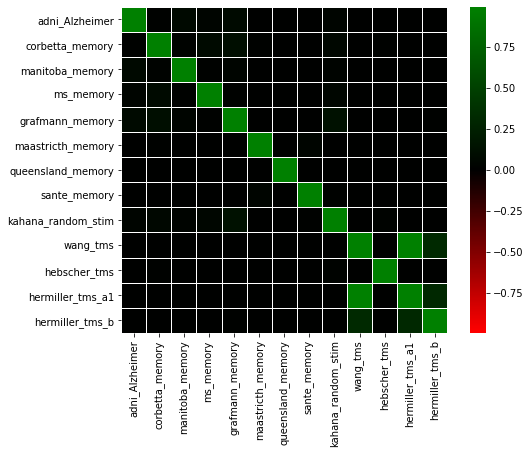

In [9]:
import numpy as np
limit = correlation_analysis.matrix_heatmap(np.abs(correlation_analysis.original_similarity_matrix), type='similarity', output_path=out_dir+'/heatmap_similarity_absval.svg')

Permuted Similarity

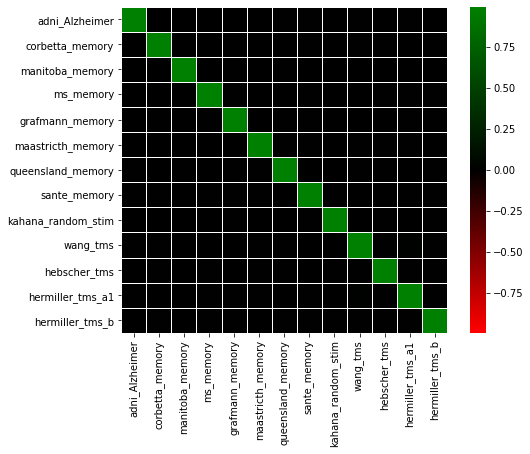

In [10]:
import numpy as np
avg_sim_mx = np.mean(correlation_analysis.permuted_similarity_tensor, axis=0)
l = correlation_analysis.matrix_heatmap(avg_sim_mx, type='similarity', output_path=out_dir+'/heatmap_similarity_permuted.svg', limit=limit)

Pairwise P values Matrix

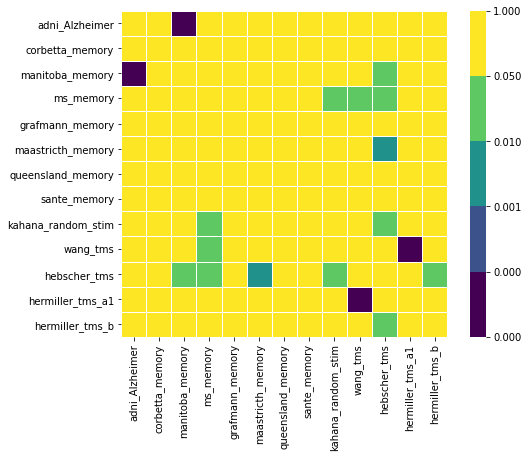

In [11]:
correlation_analysis.matrix_heatmap(pairwise_p_values, type='pvals', output_path=out_dir)

In [12]:
pairwise_p_values

array([[1.   , 0.817, 0.   , 0.999, 1.   , 0.228, 0.316, 0.366, 0.091,
        0.48 , 0.276, 0.497, 0.378],
       [0.817, 1.   , 0.859, 0.998, 0.138, 0.842, 0.811, 0.653, 0.244,
        0.642, 0.937, 0.272, 0.7  ],
       [0.   , 0.859, 1.   , 0.96 , 0.96 , 0.94 , 0.581, 0.796, 0.135,
        0.712, 0.021, 0.725, 0.804],
       [0.999, 0.998, 0.96 , 1.   , 0.668, 0.987, 0.781, 0.865, 0.028,
        0.012, 0.015, 0.147, 0.991],
       [1.   , 0.138, 0.96 , 0.668, 1.   , 0.349, 0.502, 0.285, 0.919,
        0.175, 0.84 , 0.168, 0.981],
       [0.228, 0.842, 0.94 , 0.987, 0.349, 1.   , 0.56 , 0.411, 0.377,
        0.163, 0.007, 0.327, 0.919],
       [0.316, 0.811, 0.581, 0.781, 0.502, 0.56 , 1.   , 0.355, 0.471,
        0.495, 0.43 , 0.475, 0.559],
       [0.366, 0.653, 0.796, 0.865, 0.285, 0.411, 0.355, 1.   , 0.716,
        0.286, 0.089, 0.404, 0.775],
       [0.091, 0.244, 0.135, 0.028, 0.919, 0.377, 0.471, 0.716, 1.   ,
        0.906, 0.013, 0.9  , 0.893],
       [0.48 , 0.642, 0.712,

# Optional - Run a Leave-One-Fold-Out Evaluation
- This assesses if any specific dataset or datasets are driving your effect

Define Parameters

In [13]:
tails = 'two_tail'
n_permutations = 1000
method = 'spearman'
fwe = False
datasets_to_flip = []

Define folds as an array of lists. Each list is a fold which will be left out during the evaluation. 
- The names you can enter are in your JSON file, printed below

In [14]:
folds = [['ANT DBS SANTE', 'ANT DBS Maastricht', 'Epilepsy iEEG'], ['ANT DBS SANTE'], ['Alzheimer Disease'], ['Acute Stroke'], ['Multiple Sclerosis'], ['Penetrating TBI'], ['Parietal TMS Hebscher', 'Parietal TMS Wang', 'Parietal TMS Hermiller 2019a', 'Parietal TMS Hermiller 2019b']]

Run Evaluation

In [15]:
from calvin_utils.ccm_utils.ccm_utils import CorrelationAnalysis
correlation_analysis = CorrelationAnalysis(data_dict_path=dict_path, 
                                           method=method, 
                                           datasets_to_flip=[],
                                           n_permutations=n_permutations,
                                           out_dir=out_dir,
                                           topology_command=None)
p_value, pairwise_p_values = correlation_analysis.run_lofo(folds, tails, fwe)

Running permutations: 100%|██████████| 1000/1000 [01:15<00:00, 13.26it/s]


Calculating two-tailed p-values
The observed average similarity is: 0.018737340787927527
The two_tail p-value is: 0.919. This is the proportion of permuted averages that are greater than the observed average.
  Left Out Dataset: ['ANT DBS SANTE', 'ANT DBS Maastricht', 'Epilepsy iEEG']
    P-value: 0.9190
    Observed Average Similarity: 0.0187
    Pairwise P-values:
      AD Fornix DBS: 0.0000
      PD STN DBS: 0.0000


Running permutations: 100%|██████████| 1000/1000 [01:08<00:00, 14.70it/s]


Calculating two-tailed p-values
The observed average similarity is: 0.018737340787927527
The two_tail p-value is: 0.924. This is the proportion of permuted averages that are greater than the observed average.
  Left Out Dataset: ['ANT DBS SANTE']
    P-value: 0.9240
    Observed Average Similarity: 0.0187
    Pairwise P-values:
      AD Fornix DBS: 0.0000
      PD STN DBS: 0.0000


Running permutations:  76%|███████▋  | 763/1000 [00:48<00:15, 15.77it/s]


KeyboardInterrupt: 

# Optional - Evaluate P-Values Across Specific Slices of the Similarity Matrix

In [ ]:
import numpy as np
obsv = np.load('/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_02/redo2/conn/spearman/all_data/unaligned/original_similarity_matrix.npy')
perm = np.load('/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_02/redo2/conn/spearman/all_data/unaligned/permuted_similarity_tensor.npy')

In [ ]:
from calvin_utils.ccm_utils.ccm_utils import CorrelationAnalysis

p, r = CorrelationAnalysis.calculate_slice_p_value(
    obsv,
    perm,
    row_indices=[8,9,10,11],
    col_indices=[8,9,10,11],
    method='two_tail',
    absolute_similarity=True,
    remove_diagonal=True
)
print("p: ", p)
print("r: ", r)